In [2]:
pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch import tensor

# Add the CLIP folder to the Python path

from CLIP.clip import clip
from transformers import CLIPProcessor, CLIPModel

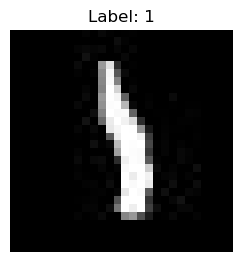

In [2]:
# Set the path to the train and test directories
train_dir = 'data/train'  # Adjust if necessary
test_dir = 'data/test'

# Function to load images and labels
def load_mnist_data(data_dir):
    images = []
    labels = []
    
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for img_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_file)
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                images.append(np.array(img))
                labels.append(int(label[-1]))  # Extract label from folder name
                
    return np.array(images), np.array(labels)

# Load train and test data
train_images, train_labels = load_mnist_data(train_dir)
test_images, test_labels = load_mnist_data(test_dir)

# Visualize some images with their labels
def plot_images(images, labels, n=10):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 10 images from the training set
plot_images(train_images, train_labels, n=1)

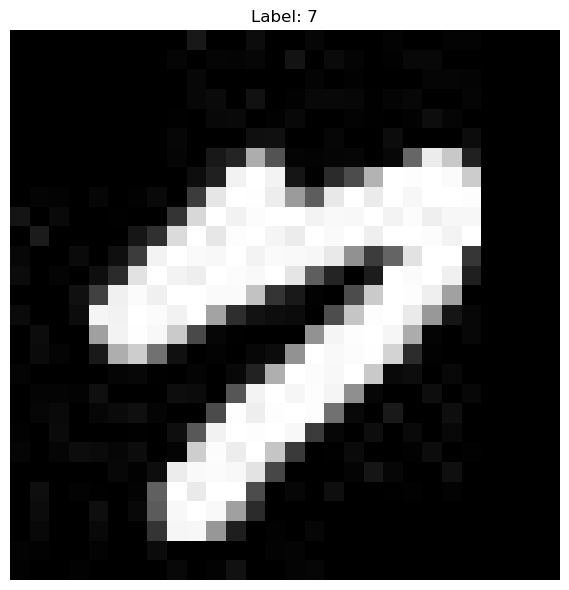

In [16]:
# Custom dataset class
class CustomMNIST(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = []
        self.labels = []

        # Load images and labels from the directory
        for label in os.listdir(data_dir):
            label_dir = os.path.join(data_dir, label)
            if os.path.isdir(label_dir):
                for img_file in os.listdir(label_dir):
                    img_path = os.path.join(label_dir, img_file)
                    self.images.append(img_path)
                    self.labels.append(int(label[-1]))  # Extract label from folder name

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define the transformations (including normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

# Load the custom dataset using DataLoader
train_dataset = CustomMNIST(data_dir='./data/train', transform=transform)
test_dataset = CustomMNIST(data_dir='./data/test', transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Visualize a single image with its label from the DataLoader
def plot_image(image, label):
    plt.figure(figsize=(6, 6))
    plt.imshow(image.numpy().squeeze(), cmap='gray')  # Convert tensor to NumPy and remove channel
    plt.title(f'Label: {label}')  # Show the label
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example: Get a batch of images and labels from the train_loader
for images, labels in train_loader:
    # Plot the first image from the current batch
    plot_image(images[17], labels[17])  # Display the first image and its corresponding label
    break  # Exit after the first batch to avoid too much output

In [14]:
print(images.shape)  # This would output: torch.Size([64, 1, 28, 28])
print(labels.shape)  # This would output: torch.Size([64])

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [15]:
labels

tensor([1, 9, 8, 5, 0, 6, 3, 7, 2, 9, 5, 9, 9, 8, 7, 4, 1, 5, 4, 3, 4, 1, 0, 4,
        3, 5, 1, 6, 9, 7, 1, 1, 9, 7, 8, 9, 6, 1, 4, 2, 4, 0, 7, 9, 1, 4, 3, 1,
        6, 2, 4, 2, 1, 2, 7, 9, 9, 1, 8, 9, 2, 6, 3, 8])

/home/x_stear/miniconda3/envs/gals/lib/python3.8/site-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


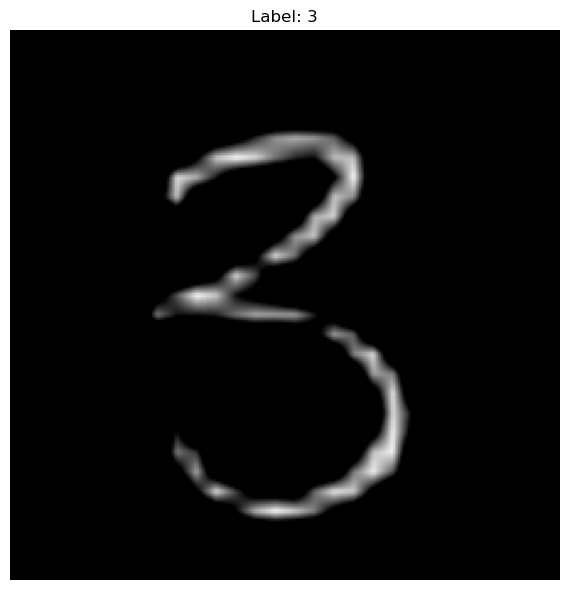

RuntimeError: cannot register a hook on a tensor that doesn't require gradient

In [16]:
# Custom dataset class
class CustomMNIST(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = []
        self.labels = []

        # Load images and labels from the directory
        for label in os.listdir(data_dir):
            label_dir = os.path.join(data_dir, label)
            if os.path.isdir(label_dir):
                for img_file in os.listdir(label_dir):
                    img_path = os.path.join(label_dir, img_file)
                    self.images.append(img_path)
                    self.labels.append(int(label[-1]))  # Extract label from folder name

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')  # Convert to grayscale
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define the transformations (including normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit CLIP model requirements
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize for 3 channels
])

# Load the custom dataset using DataLoader
train_dataset = CustomMNIST(data_dir='./data/train', transform=transform)
test_dataset = CustomMNIST(data_dir='./data/test', transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Visualize a single image with its label from the DataLoader
def plot_image(image, label):
    plt.figure(figsize=(6, 6))
    plt.imshow(image.permute(1, 2, 0).numpy())
    #plt.imshow(image.numpy().squeeze())#, cmap='gray')  # Convert tensor to NumPy and remove channel
    plt.title(f'Label: {label}')  # Show the label
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load the CLIP model
device ="cpu"
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)  # Force to load on CPU

# Example: Get a batch of images and labels from the train_loader
for images, labels in train_loader:
    # Plot the first image from the current batch
    plot_image(images[0], labels[0])  # Display the first image and its corresponding label
    
    # Preprocess the image for CLIP (no need to apply transforms again)
    img_for_clip = images[0].unsqueeze(0).to(device)  # Add batch dimension and move to device
    
    # Encode the image using CLIP
    with torch.no_grad():
        image_features = model.encode_image(img_for_clip)

    print("Image Features Shape:", image_features.shape)
    print("Image Features:", image_features)

    # Test with dummy text
    text = clip.tokenize(["a photo of a handwritten digit"]).to(device)

    # Encode the text
    #with torch.no_grad():
    text_features = model.encode_text(text)

    print("Text Features Shape:", text_features.shape)
    print("Text Features:", text_features)

    break  # Exit after the first batch to avoid too much output

In [15]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision import datasets, transforms

# CLIP Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),    # Resize the image to match CLIP's input size
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel grayscale to 3-channel
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], 
                         std=[0.26862954, 0.26130258, 0.27577711])  # CLIP's normalization
])

# Custom dataset class
"""
class CustomMNIST(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = []
        self.labels = []

        # Load images and labels from the directory
        for label in os.listdir(data_dir):
            label_dir = os.path.join(data_dir, label)
            if os.path.isdir(label_dir):
                for img_file in os.listdir(label_dir):
                    img_path = os.path.join(label_dir, img_file)
                    self.images.append(img_path)
                    self.labels.append('digit ' + label[-1])  # Extract label from folder name

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('L')  # Open as grayscale
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        label_tensor = tensor([label])
        return image, label_tensor
"""
    
class CustomMNIST(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        image, label = self.dataset[index]
        # Convert label to desired format
        formatted_label = f'digit {label}'
        return image, formatted_label

# Load the custom dataset using DataLoader
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Wrap datasets with the custom dataset class
train_dataset = CustomMNIST(train_dataset)
test_dataset = CustomMNIST(test_dataset)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Example of loading one batch
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels: {labels}")
    print(clip.tokenize(labels))
    break


Batch of images shape: torch.Size([64, 3, 224, 224])
Batch of labels: ('digit 0', 'digit 6', 'digit 2', 'digit 6', 'digit 0', 'digit 8', 'digit 5', 'digit 5', 'digit 3', 'digit 5', 'digit 9', 'digit 3', 'digit 8', 'digit 3', 'digit 8', 'digit 0', 'digit 9', 'digit 8', 'digit 0', 'digit 7', 'digit 3', 'digit 1', 'digit 0', 'digit 3', 'digit 0', 'digit 5', 'digit 1', 'digit 1', 'digit 5', 'digit 7', 'digit 0', 'digit 4', 'digit 7', 'digit 6', 'digit 0', 'digit 4', 'digit 6', 'digit 7', 'digit 0', 'digit 9', 'digit 1', 'digit 4', 'digit 9', 'digit 4', 'digit 4', 'digit 3', 'digit 4', 'digit 5', 'digit 1', 'digit 3', 'digit 9', 'digit 0', 'digit 9', 'digit 7', 'digit 1', 'digit 7', 'digit 8', 'digit 1', 'digit 1', 'digit 7', 'digit 4', 'digit 5', 'digit 4', 'digit 7')
tensor([[49406, 27472,   271,  ...,     0,     0,     0],
        [49406, 27472,   277,  ...,     0,     0,     0],
        [49406, 27472,   273,  ...,     0,     0,     0],
        ...,
        [49406, 27472,   276,  ...,   

In [17]:
# Load the CLIP model
device ="cpu"
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)  # Force to load on CPU

In [18]:
model

CLIP(
  (visual): VisualTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): _LinearWithBias(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): _LinearWithBias(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((7

In [2]:
from transformers import CLIPProcessor, CLIPModel

# Load the CLIP model and processor
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
import torch



In [5]:
# Example input images and text
images = torch.randn(64, 3, 224, 224)  # Batch of 64 images
images = (images + 1) / 2  # Adjusting the range from [-1, 1] to [0, 1]
images = images.clamp(0, 1)
texts = ["This is an example sentence."] * 64  # Corresponding text inputs

# Process the inputs
inputs = clip_processor(text=texts, images=images, return_tensors="pt", padding=True)

# Get outputs
with torch.no_grad():
    image_features = clip_model.get_image_features(pixel_values=inputs['pixel_values'])
    text_features = clip_model.get_text_features(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])

print("Image features shape:", image_features.shape)  # Should be [64, 512]
print("Text features shape:", text_features.shape)    # Should be [64, 512]


It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


Image features shape: torch.Size([64, 512])
Text features shape: torch.Size([64, 512])
